In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "BrainTumor",
    shuffle=True,
    seed=123,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    
)

Found 5712 files belonging to 4 classes.


In [4]:
class_names = dataset.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [5]:
len(dataset)

179

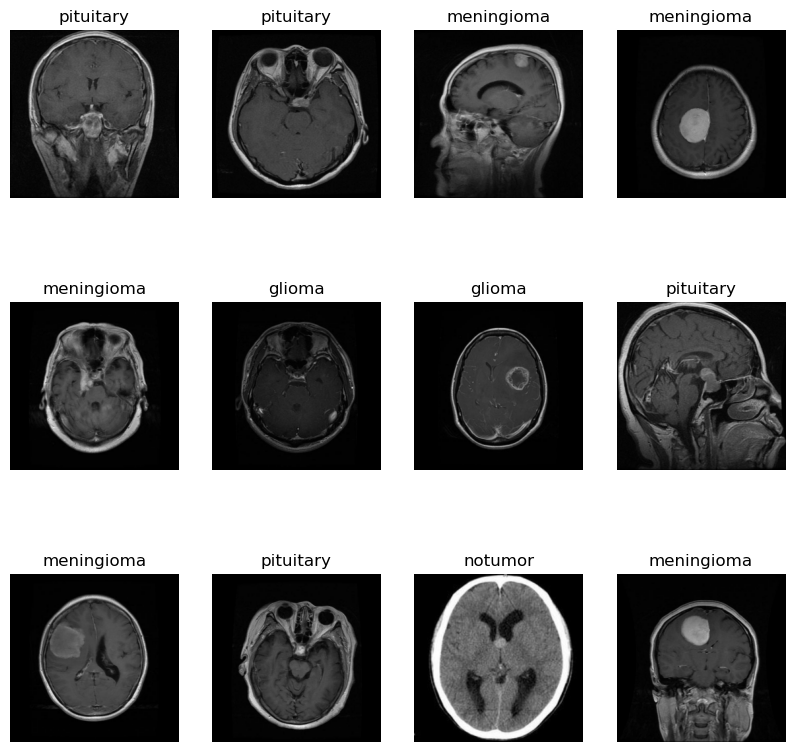

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])
    

In [7]:
training = 0.8
validation = 0.1  
test = 0.1  

In [8]:
train_ds= dataset.take(165)
len(train_ds)

165

In [9]:
test_ds  = dataset.skip(165)
len(test_ds)

14

In [10]:
val_size = 0.1
len(dataset)*val_size

17.900000000000002

In [11]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [12]:
test_ds  = test_ds.skip(6)
len(test_ds)

8

In [13]:
def get_data_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True,shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds =ds.shuffle(shuffle_size,seed=12)
    train_size= int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [14]:
train_ds,val_ds,test_ds = get_data_partitions_tf(dataset)

In [15]:
len(train_ds)

143

In [16]:
len(val_ds)

17

In [17]:
len(test_ds)

19

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [21]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 4
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
   
])

model.build(input_shape=input_shape)

In [22]:

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 32)         0         
 2D)                                                  

In [23]:
model.compile(
    optimizer='adam',
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=84,
    verbose=1,
    validation_data=val_ds,
)

Epoch 1/50
143/143 [==============================] - 138s 931ms/step - loss: 1.0154 - accuracy: 0.5592 - val_loss: 0.8923 - val_accuracy: 0.6618
Epoch 2/50
143/143 [==============================] - 145s 1s/step - loss: 0.7228 - accuracy: 0.7114 - val_loss: 0.6433 - val_accuracy: 0.7702
Epoch 3/50
143/143 [==============================] - 145s 1s/step - loss: 0.6324 - accuracy: 0.7575 - val_loss: 0.5750 - val_accuracy: 0.7886
Epoch 4/50
143/143 [==============================] - 145s 1s/step - loss: 0.5643 - accuracy: 0.7827 - val_loss: 0.5766 - val_accuracy: 0.7886
Epoch 5/50
143/143 [==============================] - 149s 1s/step - loss: 0.5347 - accuracy: 0.7969 - val_loss: 0.4954 - val_accuracy: 0.7941
Epoch 6/50
143/143 [==============================] - 149s 1s/step - loss: 0.4658 - accuracy: 0.8248 - val_loss: 0.3961 - val_accuracy: 0.8401
Epoch 7/50
143/143 [==============================] - 145s 1s/step - loss: 0.4348 - accuracy: 0.8344 - val_loss: 0.3443 - val_accuracy: 0.8

In [25]:
scores = model.evaluate(test_ds)

19/19 [==============================] - 7s 183ms/step - loss: 0.0858 - accuracy: 0.9655


In [26]:
scores

[0.08580628782510757, 0.9654605388641357]

In [27]:
history

In [28]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 143}

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
history.history['accuracy']

[0.5592105388641357,
 0.711403489112854,
 0.7574561238288879,
 0.7826754450798035,
 0.7969298362731934,
 0.8247807025909424,
 0.8344298005104065,
 0.8486841917037964,
 0.8666666746139526,
 0.8826754093170166,
 0.8831140398979187,
 0.8923245668411255,
 0.9010964632034302,
 0.9013158082962036,
 0.9192982316017151,
 0.9171052575111389,
 0.9186403751373291,
 0.9195175170898438,
 0.9355263113975525,
 0.9344298243522644,
 0.9337719082832336,
 0.9451754093170166,
 0.9392544031143188,
 0.94539475440979,
 0.9456140398979187,
 0.9524123072624207,
 0.9515351057052612,
 0.9515351057052612,
 0.952850878238678,
 0.9530701637268066,
 0.9526315927505493,
 0.9578947424888611,
 0.9624999761581421,
 0.9550438523292542,
 0.9631578922271729,
 0.9627193212509155,
 0.9592105150222778,
 0.9605262875556946,
 0.9644736647605896,
 0.9675438404083252,
 0.9668859839439392,
 0.9649122953414917,
 0.9662280678749084,
 0.9631578922271729,
 0.9664473533630371,
 0.9686403274536133,
 0.9660087823867798,
 0.97017544507980

In [31]:
acc=history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss = history.history['val_loss']

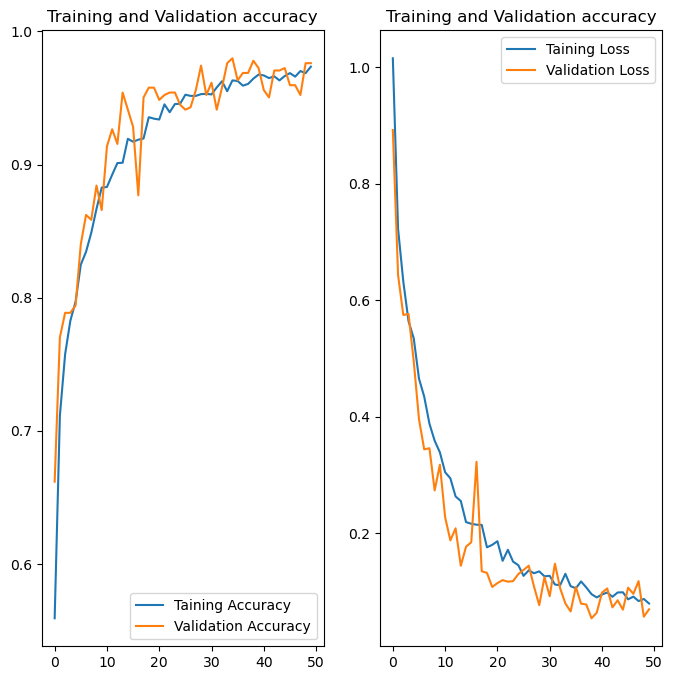

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label='Taining Accuracy')
plt.plot(range(EPOCHS),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label='Taining Loss')
plt.plot(range(EPOCHS),val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation accuracy')
plt.show()


First image to predict
First image's actual label: pituitary
1/1 [==============================] - 0s 343ms/step
Predicted label:  pituitary


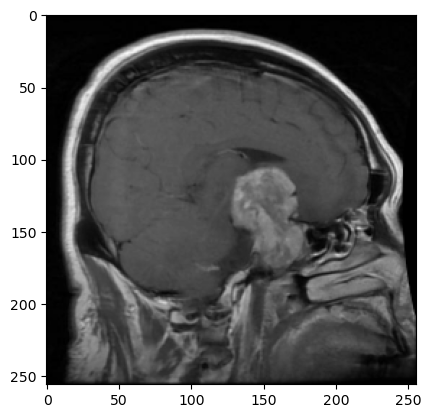

In [33]:
import numpy as np
for image_batch,label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("First image's actual label:",class_names[first_label])
    batch_prediction = model.predict(image_batch)
    print("Predicted label: ",class_names[np.argmax(batch_prediction[0])])

In [34]:
def predict(mode,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


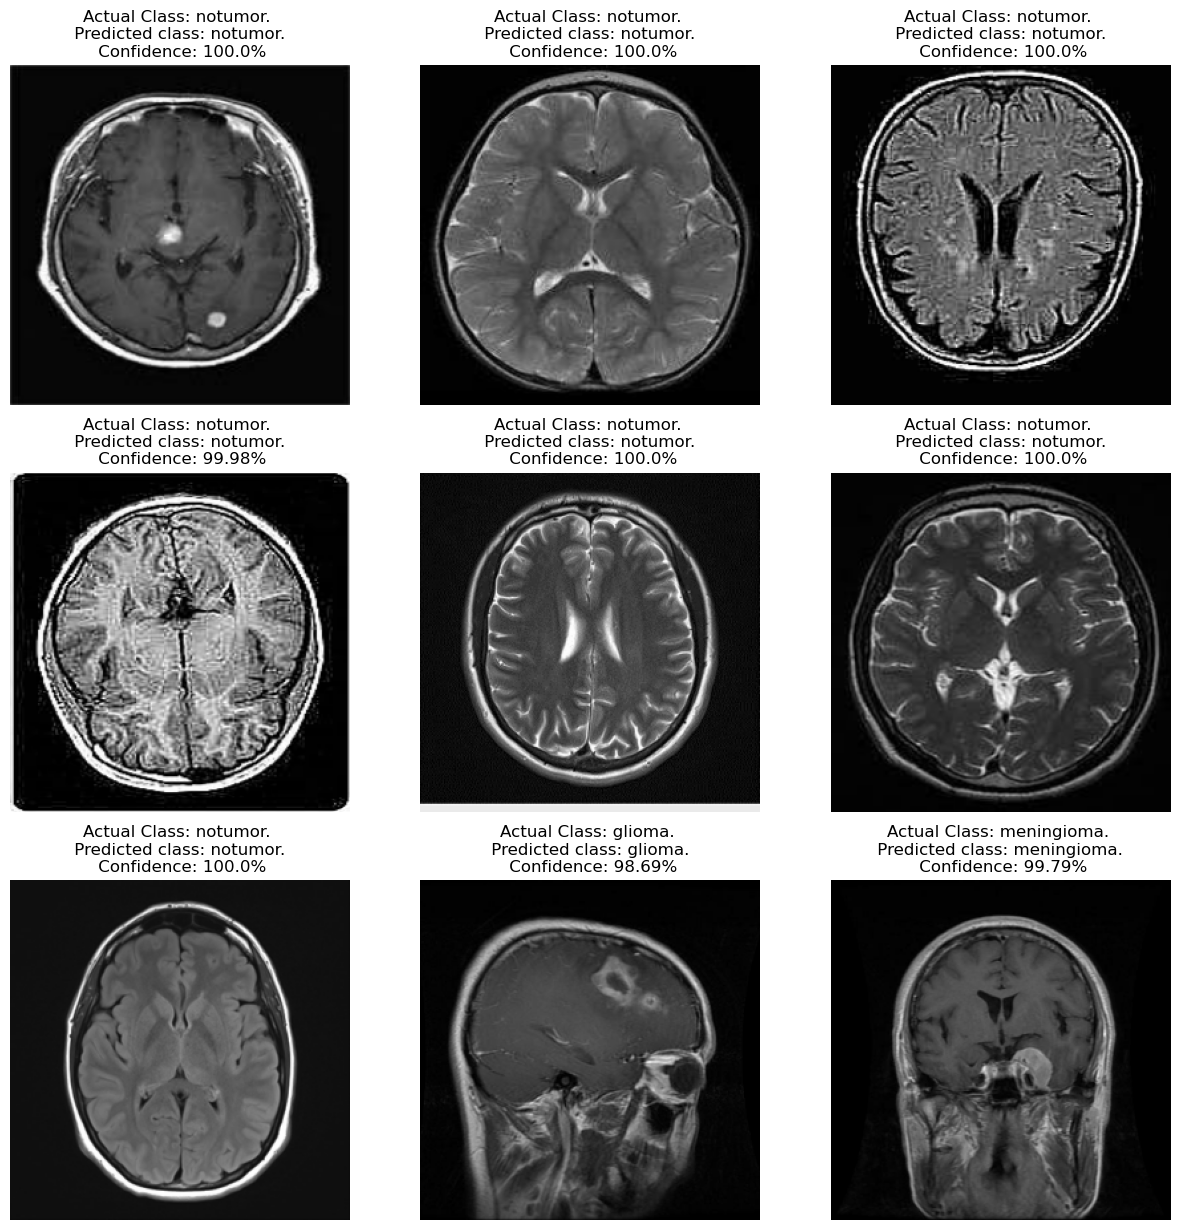

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for images, labels in test_ds:
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence= predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual Class: {actual_class}. \n Predicted class: {predicted_class}. \n Confidence: {confidence}%")
        plt.axis("off")    

In [38]:
import os
model_version = max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{model_version}")

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../models'